In [26]:
# Importer les bibliothèques
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement des données 
Dans le dataset "Bases de données annuelles des accidents corporels de la circulation routière", nous retrouvons ces tables:\
* lieux : les endroits exacts où les acciddent ont eu lieu
* vehicule : les véhicule des personnes accidentées
* caracteristiques : 


In [18]:
# Charger les données usagers
data_fn_2021 = {
    'lieux':'lieux-2021.csv', 
    'vehicules':'vehicules-2021.csv',
    'carcteristiques':'carcteristiques-2021.csv',
    'usagers':'usagers-2021.csv'
}

data_fn_2022 = {
    'lieux':'lieux-2022.csv', 
    'vehicules':'vehicules-2022.csv',
    'carcteristiques':'carcteristiques-2022.csv',
    'usagers':'usagers-2022.csv'
}

base_fpath = './data/2021' 
usagers_fpath = os.path.join(base_fpath, data_fn_2021['usagers'])
print('{}'.format(usagers_fpath))


df = pd.read_csv(usagers_fpath, sep=';')  # Attention à l'encodage et au séparateur


# Aperçu des données
df.head()

./data/2021/usagers-2021.csv


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202100000001,267 638,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
1,202100000001,267 639,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1
2,202100000002,267 636,201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1
3,202100000002,267 637,201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1
4,202100000003,267 634,201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1


In [19]:
# Information sur les colonnes et les types de données
df.info()

# Description statistique
df.describe()

# Affichage des colonnes
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129248 entries, 0 to 129247
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      129248 non-null  int64  
 1   id_usager    129248 non-null  object 
 2   id_vehicule  129248 non-null  object 
 3   num_veh      129248 non-null  object 
 4   place        129248 non-null  int64  
 5   catu         129248 non-null  int64  
 6   grav         129248 non-null  int64  
 7   sexe         129248 non-null  int64  
 8   an_nais      126181 non-null  float64
 9   trajet       129248 non-null  int64  
 10  secu1        129248 non-null  int64  
 11  secu2        129248 non-null  int64  
 12  secu3        129248 non-null  int64  
 13  locp         129248 non-null  int64  
 14  actp         129248 non-null  object 
 15  etatp        129248 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 15.8+ MB


Index(['Num_Acc', 'id_usager', 'id_vehicule', 'num_veh', 'place', 'catu',
       'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'actp', 'etatp'],
      dtype='object')

In [20]:
# Vérification des valeurs manquantes
df.isnull().sum()

# Suppression des lignes ou colonnes avec des valeurs manquantes (optionnel)
df.dropna(inplace=True)

In [21]:
# Sélection de colonnes "pertinentes" et exclures d'autres 

exclud_var = ['id_usager', 'id_vehicule', 'num_veh', 'actp']
df.columns.to_list()
target_var = 'grav'
X = df[[col for col in df.columns.to_list() if col != target_var and not col in exclud_var]]


# Gravité de l'accident est notre variable cible
y = df[target_var]
y

0         3
1         1
2         4
3         3
4         1
         ..
129243    4
129244    4
129245    3
129246    3
129247    3
Name: grav, Length: 126181, dtype: int64

In [22]:
# Encodage des variables catégorielles avec pandas
X_encoded = pd.get_dummies(X, drop_first=True)

# Vérification du jeu de données encodé
X_encoded.head()

,Num_Acc,place,catu,sexe,an_nais,trajet,secu1,secu2,secu3,locp,etatp
0,202100000001,1,1,1,2000.0,1,0,9,-1,0,-1
1,202100000001,1,1,1,1978.0,1,1,-1,-1,0,-1
2,202100000002,1,1,1,1983.0,0,1,-1,-1,0,-1
3,202100000002,1,1,1,1993.0,0,1,-1,-1,0,-1
4,202100000003,1,1,1,1995.0,1,1,0,-1,0,-1


### Classeur
On veut désormais voir comment se débrouille un classeur de type RandomForest venant de sklearn.
Donc à partir de train_test_split, on crée un dataset de train et un dataset de test.\
On doit varier une variable à la fois quand on voudra continuer le projet cet aprèm.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Modèle RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           1       0.59      0.68      0.63     15604
           2       0.11      0.06      0.08       966
           3       0.36      0.27      0.31      5736
           4       0.54      0.53      0.53     15549

    accuracy                           0.54     37855
   macro avg       0.40      0.38      0.39     37855
weighted avg       0.52      0.54      0.53     37855

Accuracy: 0.5382380134724607


              precision    recall  f1-score   support

           1       0.59      0.68      0.63     15604
           2       0.11      0.06      0.08       966
           3       0.36      0.27      0.31      5736
           4       0.54      0.53      0.53     15549

    accuracy                           0.54     37855
   macro avg       0.40      0.38      0.39     37855
weighted avg       0.52      0.54      0.53     37855



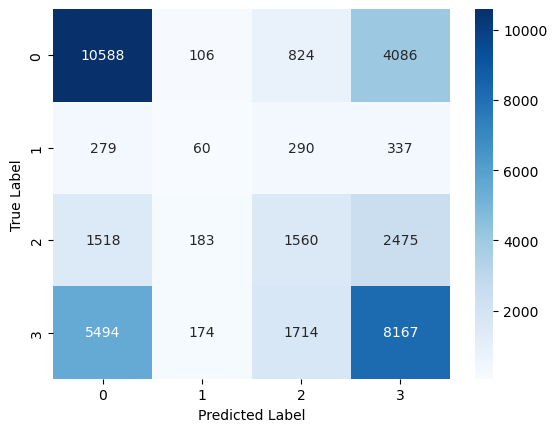

In [27]:
# Affichage du rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion pour visualiser les performances du modèle
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()